In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np

## Датасет об этих прекрасных морских обитателях 
<img src="1.jpg" alt="drawing" width="500"/>

In [2]:
# Сохраним датасет
df = pd.read_csv('abalone.csv', names = 
                 ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                  'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])

Сформулием первую гипотезу

H0: a = b; H1: a != b

a - средний диаметр раковины у infant (насколько я поняла, это что-то типа личинок, некая "детская" форма, но возраст у них может быть и достаточно большой), b - средний диаметр раковины у взрослых ушек

In [109]:
# Применим z-test для двух независимых выборок
X_1 = df[df.Sex == 'I'].Diameter
X_2 = df[df.Sex != 'I'].Diameter
# Посчитаем z-статистику:
z = (X_1.mean() - X_2.mean())/(np.sqrt(X_1.std()**2/X_1.count() + X_2.std()**2/X_2.count()))
print('Значение статистики:', z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 
p_value = 1 - (scipy.stats.norm.cdf(abs(z)) - scipy.stats.norm.cdf(-abs(z)))
print('P-value: ', p_value)

Значение статистики: -42.45457241339881
P-value:  0.0


Eсть основания отвергнуть нулевую гипотезу

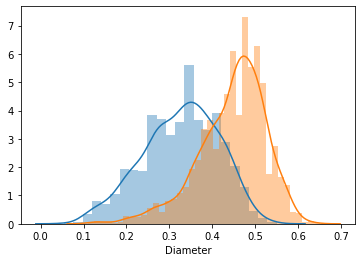

In [5]:
# нарисуем распределения, чтобы видеть, что средние действительно отличаются
sns.distplot(df[df.Sex == 'I'].Diameter);
sns.distplot(df[df.Sex != 'I'].Diameter);

Сформулируем вторую гипотезу:

H0: a = b; H1: a != b

a - средний диаметр раковины у женских особей, b - средний диаметр раковины у мужских особей

In [110]:
# Применим z-test для двух независимых выборок
X_1 = df[df.Sex == 'F'].Diameter
X_2 = df[df.Sex == 'M'].Diameter
# Посчитаем z-статистику:
z = (X_1.mean() - X_2.mean())/(np.sqrt(X_1.std()**2/X_1.count() + X_2.std()**2/X_2.count()))
print('Значение статистики:', z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 
p_value =  1 - (scipy.stats.norm.cdf(abs(z)) - scipy.stats.norm.cdf(-abs(z)))
print('P-value: ', p_value)

Значение статистики: 5.293544096523467
P-value:  1.199682966301907e-07


Так как значение статистики попало в критическую область, есть основания отвергнуть нулевую гипотезу

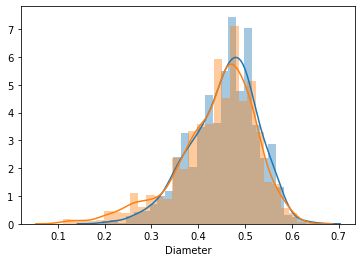

In [7]:
# нарисуем графики, чтобы посмотреть, насколько отличаются средние
sns.distplot(df[df.Sex == 'F'].Diameter);
sns.distplot(df[df.Sex == 'M'].Diameter);

Согласно википедии, средний размер морского ушка равен 6 см, в нашем датасете размеры указаны, видимо, в дециметрах (что странно, ведь в описании к датасету указано, что величины в мм, но даже по картинке к датасету видно, что это не микробы какие-то, а вполне себе большие существа, поэтому я решила считать, что здесь все в дециметрах)

Проверим гипотезу о том, что среднее действительно 6, применяя z-test.

In [111]:
X = df.Length
# Посчитаем z-статистику:
z = X.count()*(X.mean() - 0.6)/(X.std())
print('Значение статистики:', z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 
p_value =  1 - (scipy.stats.norm.cdf(abs(z)) - scipy.stats.norm.cdf(-abs(z)))
print('P-value: ', p_value)

Значение статистики: -2643.6614219735197
P-value:  0.0


Нулевую гипотезу можно отклонить. 

Возможно, если мы уберем из выборки "детей", что-то изменится:

In [112]:
X = df[df.Sex != 'I'].Length
# Посчитаем z-статистику:
z = X.count()*(X.mean() - 0.6)/(X.std())
print('Значение статистики:', z)
# Доверительная область уровня значимости 0.05: (-1.96, 1.96) 
p_value =  1 - (scipy.stats.norm.cdf(abs(z)) - scipy.stats.norm.cdf(-abs(z)))
print('P-value: ', p_value)

Значение статистики: -900.8490496917295
P-value:  0.0


Но все же гипотеза отклоняется

Проверим, что диаметр ушка в подгруппах для разного количества колец распределен нормально с помощью Шапиро теста на нормальность.

In [100]:
# Для каждого уникального значения количества колец проверяется нормальность диаметра
print('Диаметр ушек со следуюим количество колец не распределен нормально: ')
for n_rings in df.Rings.unique():
    if df[df.Rings == n_rings].shape[0] > 10:
        X = df[df.Rings == n_rings].Diameter
        if scipy.stats.shapiro(X)[1] < 0.05:
            print('Количество колец: ', n_rings, '; P-value: ', scipy.stats.shapiro(X)[1], sep = '')

Диаметр ушек со следуюим количество колец не распределен нормально: 
Количество колец: 9; P-value: 1.3939747967040006e-10
Количество колец: 10; P-value: 1.5274552456201462e-11
Количество колец: 8; P-value: 0.007633548695594072
Количество колец: 11; P-value: 1.4213797916440285e-09
Количество колец: 12; P-value: 0.019435716792941093
Количество колец: 6; P-value: 0.011130288243293762


Теперь с поправкой Бонферрони для множественной проверки гипотез:

In [101]:
# Для каждого уникального значения количества колец проверяется нормальность диаметра с поправкой
print('Диаметр ушек со следуюим количество колец не распределен нормально: ')
for n_rings in df.Rings.unique():
    if df[df.Rings == n_rings].shape[0] > 20:
        X = df[df.Rings == n_rings].Diameter
        if scipy.stats.shapiro(X)[1] < 0.05/17:
            print('Количество колец: ', n_rings, '; P-value: ', scipy.stats.shapiro(X)[1], sep = '')

Диаметр ушек со следуюим количество колец не распределен нормально: 
Количество колец: 9; P-value: 1.3939747967040006e-10
Количество колец: 10; P-value: 1.5274552456201462e-11
Количество колец: 11; P-value: 1.4213797916440285e-09


Количество отклоненных гипотез уменьшилось в 2 раза

Проверим еще одну гипотезу

H0: med = выборочное среднее; H1: med < выборочное среднее

в случае верности нулевой гипотезы S = #{x_i < выборочное среднее} распределена биномиально с параметрами n, p, 
где p = P(x_i < выборочное среднее) = 1/2

Посчитаем S и y = S/n:

In [21]:
S = 0
for i in range(len(df)):
    if df.Whole_weight.iloc[i] < df.Whole_weight.mean():
        S += 1
y = S/len(df)

Теперь посчитаем следующую статистику:

In [22]:
stat = (y - 0.5)/np.sqrt(0.5*0.5 / len(df))

т.к. количество наблюдей достаточно велико (> 6000), то по ЦПТ эта статистика должна стремиться к стандартному нормальному распределению (по распределению) в случае верности нулевой гипотезы

Тогда p-value:

In [46]:
p_value = 1 - scipy.stats.norm.cdf(stat)
print(p_value)

0.002806053002654796


Значит есть основания отвергнуть нулевую гипотезу

Покажем, что shapiro тест работает корректно, для этого сгенерируем несколько нормальных и ненормальных выборок и покажем, что в случае верности нулевой гипотезы значения p-value распределены равномерно, а значит вероятность отвергнуть нулевую гипотезу, в случае ее верности, действительно равна заранее установленному уровню значимости

Фактическая частота ошибок первого рода: 0.047


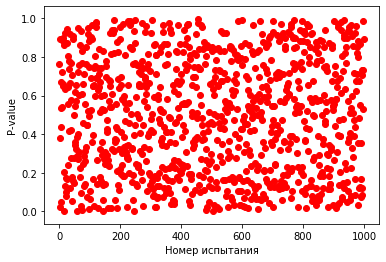

In [59]:
samples_1, p_value = [], []
errors = 0
for i in range(1000):
    samples_1.append(np.random.normal(0, 1, 100))
for sample_1 in samples_1:
    if scipy.stats.shapiro(sample_1)[1] < 0.05:
        errors += 1
    p_value.append(scipy.stats.shapiro(sample_1)[1])
fig, ax = plt.subplots()
plt.scatter(x=[i for i in range(len(p_value))], y=p_value, c='r');
ax.set_xlabel('Номер испытания');
ax.set_ylabel('P-value');

print('Фактическая частота ошибок первого рода:', errors/1000)

На следующем графике отражена зависимость уровня значимости от ошибки первого рода (черная прямая просто прояма y = x, чтобы видеть, что нет системных сдвигов)

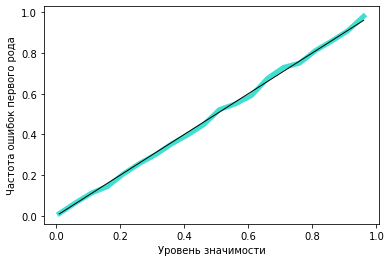

In [86]:
samples_1, p_value = [], []
errors = []
for alpha in range(1, 100, 5):
    samples_1 = []
    for i in range(1000):
        samples_1.append(np.random.normal(0, 1, 100))
    error = 0
    for sample_1 in samples_1:
        if scipy.stats.shapiro(sample_1)[1] < alpha/100:
            error += 1
    errors.append(error/1000)

fig, ax = plt.subplots()
plt.plot([i/100 for i in range(1, 100, 5)], errors, c='turquoise', lw=5);
plt.plot([i/100 for i in range(1, 100, 5)], [i/100 for i in range(1, 100, 5)], c='k', lw=1);
ax.set_xlabel('Уровень значимости');
ax.set_ylabel('Частота ошибок первого рода');

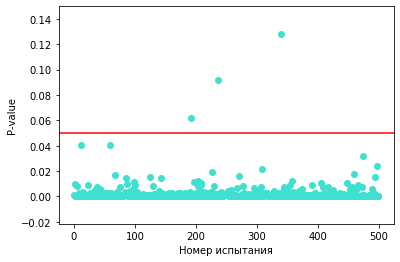

In [9]:
# в случае верности альтернативной гипотезы видно, что p-value смещен
samples_1, p_value = [], []
for i in range(500):
    samples_1.append(np.random.uniform(-1, 1, 100))
for sample_1 in samples_1:
    p_value.append(scipy.stats.shapiro(sample_1)[1])
fig, ax = plt.subplots()
plt.scatter(x=[i for i in range(len(p_value))], y=p_value, c='turquoise');
plt.axhline(y=0.05, color='r')
ax.set_xlabel('Номер испытания');
ax.set_ylabel('P-value');